#### Data Cleaning and Exploration
Import libraries and load data: Import pandas, matplotlib, and optionally seaborn.
 Load the video game data using pandas.read_csv
 Print the first few rows of the data to get a sense of its structure.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# loading the video game file using pandas
vg_df = pd.read_csv("vgsales-12-4-2019.csv")
# with the head method first few row of the data is displayed
vg_df.head()



,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


#### Data summary:
-Get basic information about the data using df.info(). -Describe the numerical columns using df.describe(). -Identify and handle missing values (e.g., dropping rows, imputing values).

In [36]:
# Get basic information about the data using df.info().
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   6536 non-null   float64
 8   User_Score     335 non-null    float64
 9   Total_Shipped  1827 non-null   float64
 10  Global_Sales   19415 non-null  float64
 11  NA_Sales       12964 non-null  float64
 12  PAL_Sales      13189 non-null  float64
 13  JP_Sales       7043 non-null   float64
 14  Other_Sales    15522 non-null  float64
 15  Year           54813 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


In [37]:
# Describe the numerical columns using df.describe().
vg_df.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,55792.000000,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000
mean,27896.500000,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095
std,16105.907446,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,13948.750000,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000
50%,27896.500000,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000
75%,41844.250000,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000
max,55792.000000,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000


In [38]:
# Identify and handle missing values (e.g., dropping rows, imputing values).
vg_df.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

In [39]:
# Identify and handle missing values (e.g., dropping rows, imputing values).
vg_df['ESRB_Rating'] = vg_df['ESRB_Rating'].astype(str).str.replace('NaN', '')
vg_df['ESRB_Rating'] = vg_df['ESRB_Rating'].astype(str).str.replace('nan', '')

vg_df['Critic_Score'] = vg_df['Critic_Score'].astype(str).str.replace('NaN', '')
vg_df['Critic_Score'] = vg_df['Critic_Score'].astype(str).str.replace('nan', '')
vg_df['Critic_Score'] = vg_df['Critic_Score'].astype(str).str.replace('', str(0))

vg_df['User_Score'] = vg_df['User_Score'].astype(str).replace('NaN', '')
vg_df['User_Score'] = vg_df['User_Score'].astype(str).replace('nan', '')
vg_df['User_Score'] = vg_df['User_Score'].astype(str).str.replace('', str(0))

vg_df['Global_Sales'] = vg_df['Global_Sales'].astype(str).str.replace('NaN', '')
vg_df['Global_Sales'] = vg_df['Global_Sales'].astype(str).str.replace('nan', '')
vg_df['Global_Sales'] = vg_df['Global_Sales'].astype(str).str.replace('', str(0))

vg_df['NA_Sales'] = vg_df['NA_Sales'].astype(str).str.replace('NaN', '')
vg_df['NA_Sales'] = vg_df['NA_Sales'].astype(str).str.replace('nan', '')
vg_df['NA_Sales'] = vg_df['NA_Sales'].astype(str).str.replace('', str(0))

vg_df['PAL_Sales'] = vg_df['PAL_Sales'].astype(str).str.replace('NaN', '')
vg_df['PAL_Sales'] = vg_df['PAL_Sales'].astype(str).str.replace('nan', '')
vg_df['PAL_Sales'] = vg_df['PAL_Sales'].astype(str).str.replace('', str(0))

vg_df['JP_Sales'] = vg_df['JP_Sales'].astype(str).str.replace('NaN', '')
vg_df['JP_Sales'] = vg_df['JP_Sales'].astype(str).str.replace('nan', '')
vg_df['JP_Sales'] = vg_df['JP_Sales'].astype(str).str.replace('', str(0))

vg_df['Other_Sales'] = vg_df['Other_Sales'].astype(str).str.replace('NaN', '')
vg_df['Other_Sales'] = vg_df['Other_Sales'].astype(str).str.replace('nan', '')
vg_df['Other_Sales'] = vg_df['Other_Sales'].astype(str).str.replace('', str(0))

vg_df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,070.070,0,82.86,0,0,0,0,0,2006.0
1,2,Super Mario Bros.,Platform,,NES,Nintendo,Nintendo EAD,01000.000,0,40.24,0,0,0,0,0,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,080.020,090.010,37.14,0,0,0,0,0,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,,PC,PUBG Corporation,PUBG Corporation,0,0,36.60,0,0,0,0,0,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,080.000,080.080,33.09,0,0,0,0,0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,Role-Playing,,PC,505 Games,Lab Zero Games,0,0,NaN,0,0,0,0,0,2019.0
55788,55789,Lost Ember,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,0,0,NaN,0,0,0,0,0,2019.0
55789,55790,Lost Ember,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,0,0,NaN,0,0,0,0,0,2019.0
55790,55791,Lost Ember,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,0,0,NaN,0,0,0,0,0,2019.0


#### Visualize data distribution:
-Create histograms or density plots for key numerical columns like “Critic Score,” “User Score,” and “Global_Sales” using matplotlib or seaborn.

Text(0.5, 1.0, 'Data Distribution')

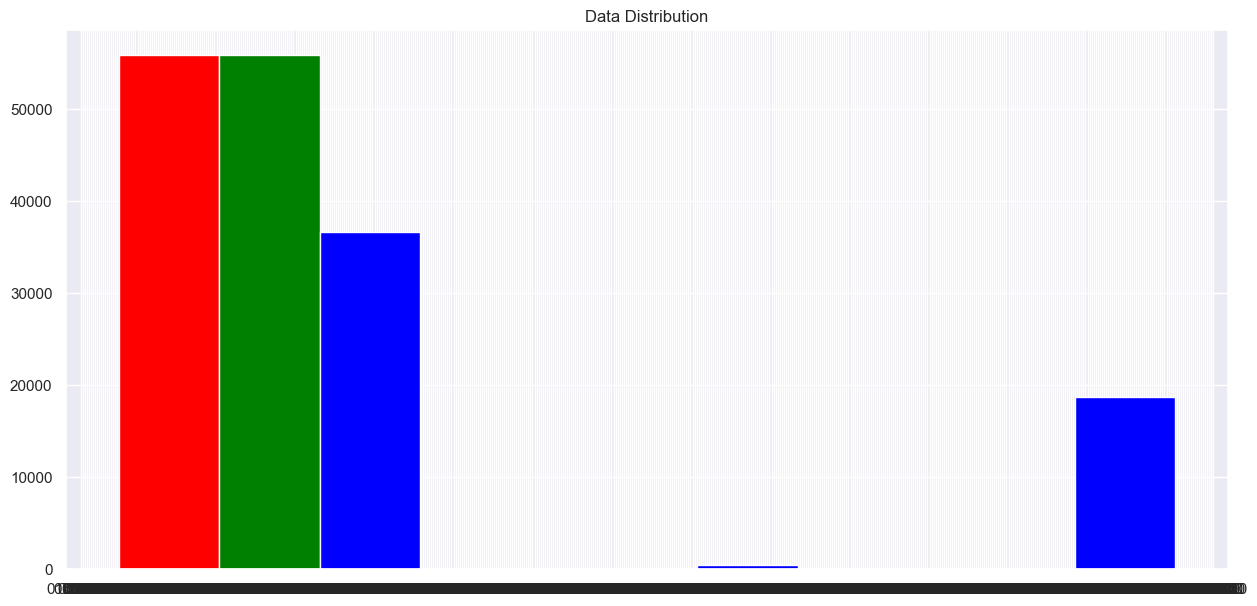

In [40]:
plt.figure(figsize=(15,7))
plt.hist(vg_df[['Critic_Score','User_Score','Global_Sales']], bins = 3,  color = ('red', 'Green','blue'))
plt.title('Data Distribution')

#### Basic Grouping and Analysis 
Question 1. Top Genres by Sales:
-Group the data by “Genre” and calculate the total global sales for each genre.
-Create a bar chart (using matplotlib or seaborn) to visualize the top-selling genrer time. 

In [41]:
TGS = vg_df.groupby('Genre')['Global_Sales'].sum()
print(TGS)


Genre
Action              12953.069
Action-Adventure     1746.168
Adventure            1118.184
Board Game              0.030
Education               0.001
Fighting             1428.844
MMO                    50.573
Misc                 3011.588
Music                 192.813
Party                   0.441
Platform             1771.404
Puzzle                317.963
Racing               2346.557
Role-Playing         1697.705
Sandbox                10.081
Shooter             17483.234
Simulation           1156.778
Sports               7338.291
Strategy              298.955
Visual Novel            0.098
Name: Global_Sales, dtype: float64


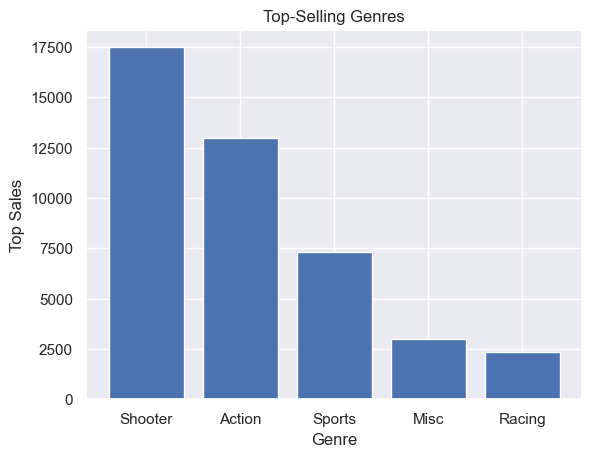

In [42]:
Total_Global_Sales = vg_df.groupby('Genre')['Global_Sales' ].sum()
# selecting only the top 5 Genre, to get a neat and accurate bar chart 
TGS = Total_Global_Sales.nlargest(5)

# this insert the list for genre into the chart and also it top ssales
plt.bar(TGS.index, TGS.values)

# X and Y label Title
plt.xlabel('Genre')
plt.ylabel('Top Sales')

# chart title
plt.title('Top-Selling Genres')
plt.show()

#### Question 2. Correlation between Scores and Sales:
-Calculate the correlation coefficient between “Critic Score” and “Global_Sales” using pandas.
-Discuss the interpretation of the correlation value.

In [43]:
# Calculate the correlation coefficient (r) between Global_Sales and Critic_Score
corr_coef = vg_df['Global_Sales'].corr(vg_df['Critic_Score'])
print("Correlation Coefficient: ", corr_coef)

# Round the correlation coefficient (r) to three decimal places for easier interpretation
r = corr_coef.round(3)
print("Correlation Coefficient (rounded): ", r)


Correlation Coefficient:  0.12437120577786277
Correlation Coefficient (rounded):  0.124


# Discuss the interpretation of the correlation value.
-> if the two variables of the correlation have a linear relationship correlation coefficient (r) = +1 0r -1, depending on the on the slope of the
 char          
-> while if the two variables have no linear relationship r might be 0

#### Question 3. Sales Over Time:
-Group the data by “Year” and calculate the average “Global_Sales” for each year.
-Create a line chart (using matplotlib or seaborn) to visualize the trend of global sales over time. 

In [44]:
#This shows the average game sales for each year in the dataset
avg_GS = vg_df.groupby('Year')['Global_Sales'].mean()
print(avg_GS)

Year
1970.0    0.000977
1973.0    0.000000
1975.0    0.000000
1977.0    0.844333
1978.0    0.630915
1979.0    0.006020
1980.0    0.006651
1981.0    2.167943
1982.0    0.755986
1983.0    0.238056
1984.0    0.004949
1985.0    0.002268
1986.0    0.481532
1987.0    0.116729
1988.0    0.143352
1989.0    0.183678
1990.0    0.090528
1991.0    0.013271
1992.0    0.011578
1993.0    0.087394
1994.0    0.105042
1995.0    0.183616
1996.0    0.332568
1997.0    0.578684
1998.0    0.746866
1999.0    0.660814
2000.0    0.448228
2001.0    1.347372
2002.0    1.328322
2003.0    0.740253
2004.0    0.662252
2005.0    0.586686
2006.0    0.484743
2007.0    0.766348
2008.0    1.415887
2009.0    0.849293
2010.0    1.044109
2011.0    1.421705
2012.0    2.028019
2013.0    3.598224
2014.0    0.885250
2015.0    1.438505
2016.0    1.630136
2017.0    1.903351
2018.0    1.198655
2019.0    0.000243
2020.0    0.000749
Name: Global_Sales, dtype: float64


Year
2013.0    3.598224
1981.0    2.167943
2012.0    2.028019
2017.0    1.903351
2016.0    1.630136
2015.0    1.438505
2011.0    1.421705
Name: Global_Sales, dtype: float64


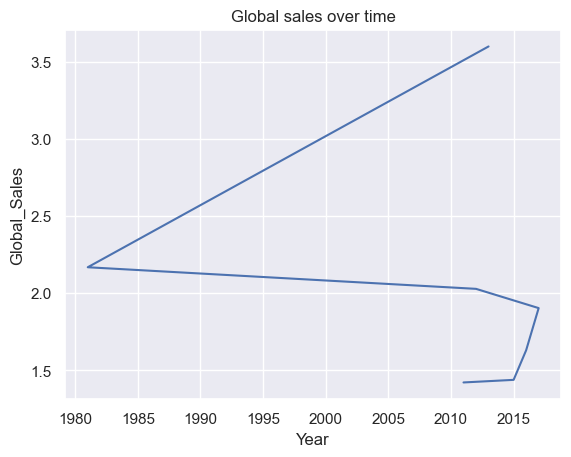

In [45]:
# Create a line chart (using matplotlib or seaborn) to visualize the trend of global sales over time.
avg_GS = vg_df.groupby('Year')['Global_Sales'].mean()
GS_Chart =  avg_GS.nlargest(7)
print(GS_Chart)

plt.plot(GS_Chart.index, GS_Chart.values)

plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.title('Global sales over time')
plt.show()

#### Advanced Analysis and Visualization
Question 1. Platform Comparison:                                                     
Analyze the sales performance of a specific genre across different platforms (e.g., PS4, XOne).
Create a boxplot (using seaborn) to compare the distribution of “Global_Sales” for that genre across platforms.



In [46]:
# Analyze the sales performance of a specific genre across different platforms (e.g., PS4, XOne).

Global_platform_sales = vg_df.groupby('Platform')['Global_Sales'].sum()
Top_GPS = Global_platform_sales.nlargest(7)
Top_GPS.head(7)


Platform
PS3     12294.7952
X360    11443.0259
PS4      9385.3899
PS2      6970.8712
PS       2929.0116
Wii      2697.0839
XOne     1599.9796
Name: Global_Sales, dtype: float64

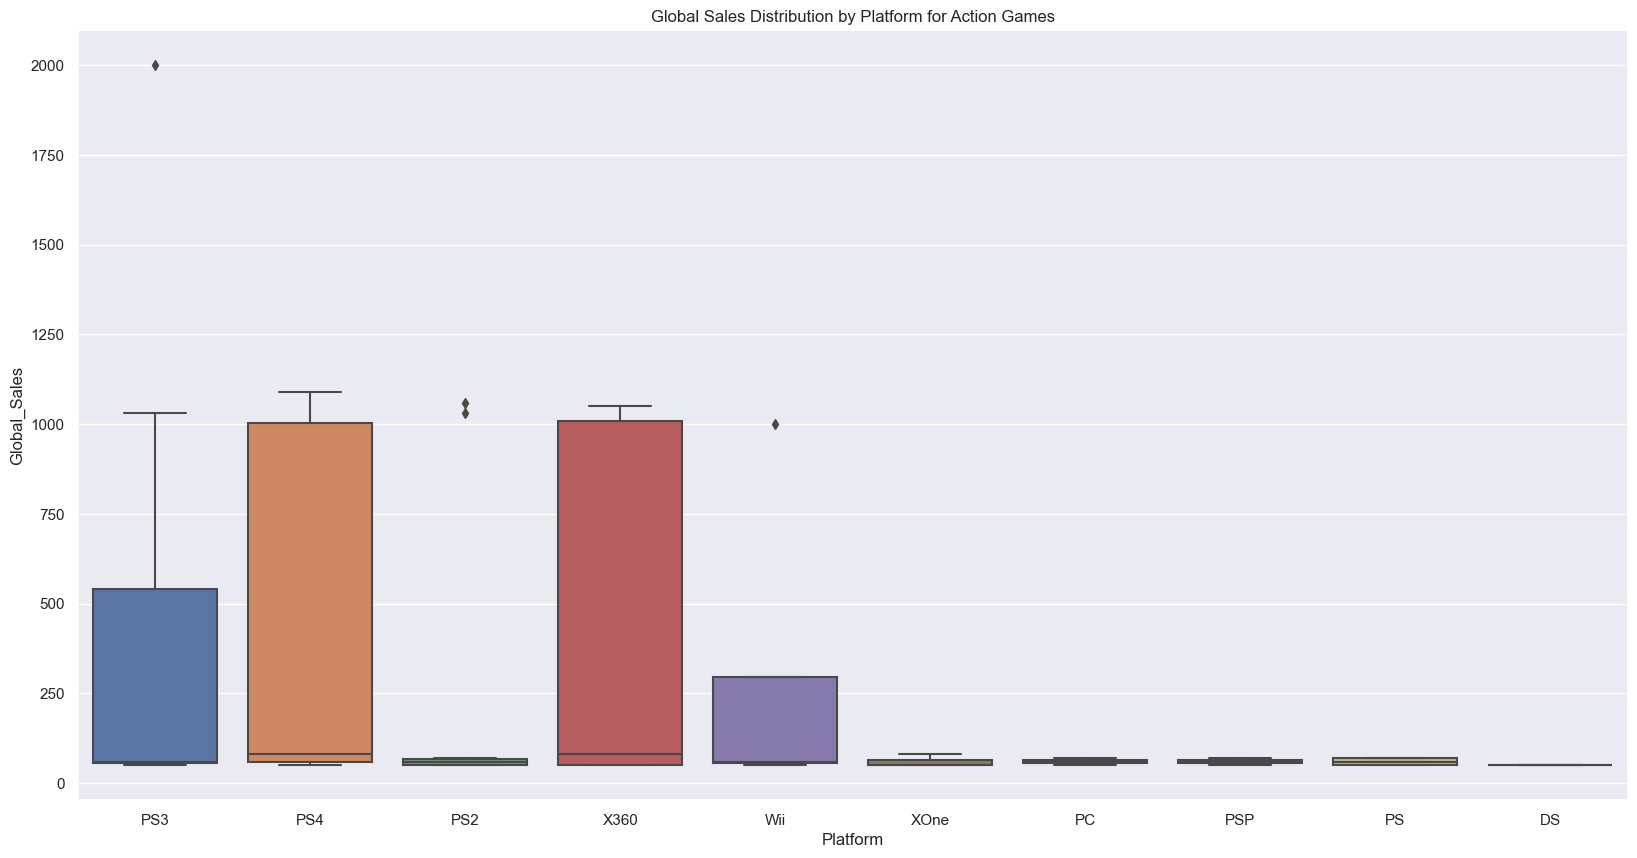

In [47]:
# Create a boxplot (using seaborn) to compare the distribution of "Global_Sales" for that genre across platforms.

# Get the top 100 platforms by global sales
Top_GPS = vg_df.nlargest(100,'Global_Sales')

#  This line creates a new figure (window) for the plot with a size of 20 inches wide and 10 inches tall.
plt.figure(figsize=(20, 10), edgecolor='white')

#This line creates the boxplot itself.
sns.boxplot(x='Platform', y='Global_Sales', data=Top_GPS)
plt.title('Global Sales Distribution by Platform for Action Games')
plt.show()


#### Question 2. Predicting Sales:
Explore building a simple linear regression model (using libraries like scikit-learn) to predict “Global_Sales” based on “Critic Score” and “User Score”.
Evaluate the model’s performance and visualize the results.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Replace "NaN" with an empty string in the "Critic_Score" column
vg_df['Critic_Score'] = vg_df['Critic_Score'].astype(str).str.replace('NaN','')

# Replace "nan" with an empty string in the "Critic_Score" column
vg_df['Critic_Score'] = vg_df['Critic_Score'].astype(str).str.replace('nan','')

# Replace empty strings with the string "0" in the "Critic_Score" column
vg_df['Critic_Score'] = vg_df['Critic_Score'].astype(str).str.replace('', str(0))


vg_df['User_Score'] = vg_df['User_Score'].astype(str).str.replace('NaN','')
vg_df['User_Score'] = vg_df['User_Score'].astype(str).str.replace('nan','')
vg_df['User_Score'] = vg_df['User_Score'].astype(str).str.replace('', str(0))


vg_df['Global_Sales'] = vg_df['Global_Sales'].astype(str).str.replace('NaN','')
vg_df['Global_Sales'] = vg_df['Global_Sales'].astype(str).str.replace('nan','')
vg_df['Global_Sales'] = vg_df['Global_Sales'].astype(str).str.replace('', str(0))

vg_df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,0007000.0007000,000,82.86,000.000,0,0,0,0,2006.0
1,2,Super Mario Bros.,Platform,,NES,Nintendo,Nintendo EAD,00010000000.0000000,000,40.24,000.000,0,0,0,0,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,0008000.0002000,0009000.0001000,37.14,000.000,0,0,0,0,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,,PC,PUBG Corporation,PUBG Corporation,000,000,36.60,000.000,0,0,0,0,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,0008000.0000000,0008000.0008000,33.09,000.000,0,0,0,0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,Role-Playing,,PC,505 Games,Lab Zero Games,000,000,NaN,000.000,0,0,0,0,2019.0
55788,55789,Lost Ember,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,000,000,NaN,000.000,0,0,0,0,2019.0
55789,55790,Lost Ember,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,000,000,NaN,000.000,0,0,0,0,2019.0
55790,55791,Lost Ember,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,000,000,NaN,000.000,0,0,0,0,2019.0


In [50]:
x = vg_df[['Critic_Score', 'User_Score']]
y = vg_df['Global_Sales']

reg = LinearRegression()
reg.fit(x,y)
y_pred = reg.predict(x)
print(y_pred)

[   4775.53676558 1201301.18275258    4765.6879625  ...    3937.38202125
    3937.38202125    3937.38202125]
